In [1]:
import tensorflow as tf
print(tf.__version__)

2.2.0


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Input, Dense, GlobalMaxPooling1D, Conv1D, MaxPooling1D, Embedding
from tensorflow.keras.models import Model

In [3]:
!wget -nc https://lazyprogrammer.me/course_files/spam.csv

File ‘spam.csv’ already there; not retrieving.



In [4]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df.columns = ['labels', 'data']
df.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
df['b_labels'] = df['labels'].map({'ham': 0, 'spam': 1})
Y = df['b_labels'].values

In [8]:
df_train, df_test, Y_train, Y_test = train_test_split(df['data'], Y, test_size=0.33)

In [9]:
MAX_VOCAB_SIZE = 20000
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(df_train)
sequences_train = tokenizer.texts_to_sequences(df_train)
sequences_test = tokenizer.texts_to_sequences(df_test)

In [10]:
word2idx = tokenizer.word_index
V = len(word2idx)
print('Found %s unique tokens.' %V)

Found 7296 unique tokens.


In [11]:
X_train = pad_sequences(sequences_train)
print('Shape of X_train tensor:', X_train.shape)

T = X_train.shape[1]

Shape of X_train tensor: (3733, 189)


In [12]:
X_test = pad_sequences(sequences_test, maxlen=T)
print('Shape of X_test tensor:', X_test.shape)

Shape of X_test tensor: (1839, 189)


In [13]:
D = 20    # Hyperparameter - Embedding dimentionality

i = Input(shape=(T,))
x = Embedding(V + 1, D)(i)
x = Conv1D(32, 3, activation='relu')(x)
x = MaxPooling1D(3)(x)
x = Conv1D(64, 3, activation='relu')(x)
x = MaxPooling1D(3)(x)
x = Conv1D(128, 3, activation='relu')(x)
x = GlobalMaxPooling1D()(x)
x = Dense(1, activation='sigmoid')(x)

model = Model(i, x)

In [14]:
print('Compiling the model')
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
print('Model Compiled')

print('Training the model')
r = model.fit(X_train, Y_train,
              epochs=5,
              validation_data=(X_test, Y_test))
print('Model Trained ')

Compiling the model
Model Compiled
Training the model
Epoch 1/5
117/117 [==============================] - 2s 14ms/step - loss: 0.3858 - accuracy: 0.8671 - val_loss: 0.3152 - val_accuracy: 0.8515
Epoch 2/5
117/117 [==============================] - 1s 10ms/step - loss: 0.1746 - accuracy: 0.9202 - val_loss: 0.0924 - val_accuracy: 0.9695
Epoch 3/5
117/117 [==============================] - 1s 10ms/step - loss: 0.0334 - accuracy: 0.9879 - val_loss: 0.0820 - val_accuracy: 0.9842
Epoch 4/5
117/117 [==============================] - 1s 10ms/step - loss: 0.0099 - accuracy: 0.9973 - val_loss: 0.0606 - val_accuracy: 0.9869
Epoch 5/5
117/117 [==============================] - 1s 10ms/step - loss: 0.0038 - accuracy: 0.9992 - val_loss: 0.0587 - val_accuracy: 0.9880
Model Trained 


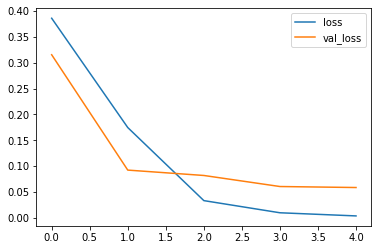

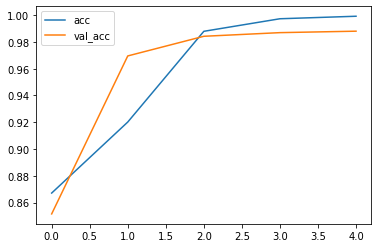

In [15]:
plt.figure(1)
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

plt.figure(2)
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()